In [93]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [94]:
def show_image(window_name, image, cmap=None):
    if image is None:
        print(f"{window_name}: imagem nao carregada (None)")
        return

    if len(image.shape) == 3 and image.shape[2] == 3:
        img_disp = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
        img_disp = image
        if cmap is None:
            cmap = 'gray'
    plt.figure(figsize=(8, 6))
    plt.title(window_name)
    plt.axis('off')
    plt.imshow(img_disp, cmap=cmap)
    plt.show()

def close_all_windows():
    pass

Corrupt JPEG data: 2 extraneous bytes before marker 0xd7


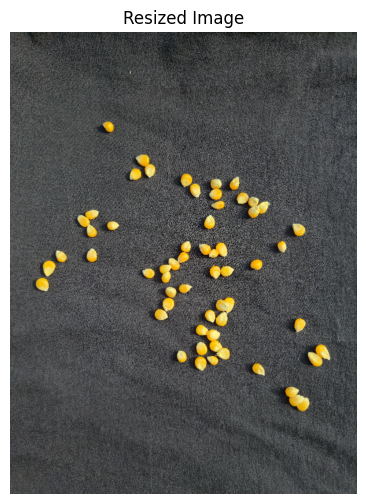

In [95]:
img = cv2.imread('imagens/20251115_152402.jpg')
img = cv2.resize(img, (600, 800))
show_image("Resized Image", img)

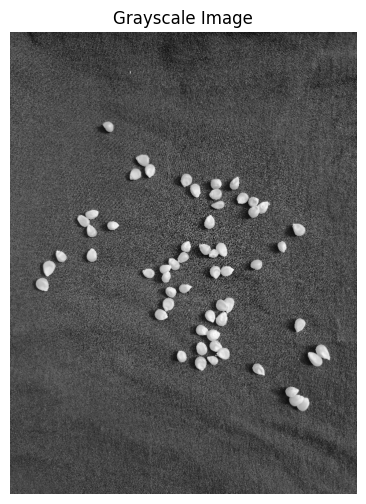

In [96]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_image("Grayscale Image", gray)

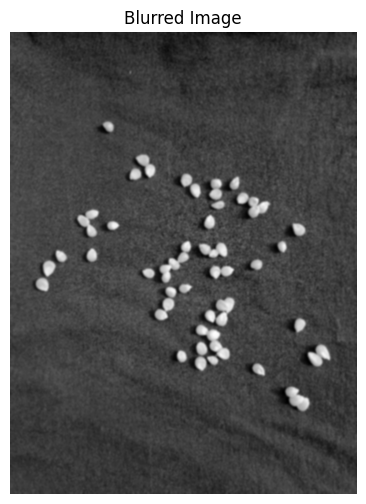

In [97]:
blur = cv2.GaussianBlur(gray, (7, 7), 0)
show_image("Blurred Image", blur)

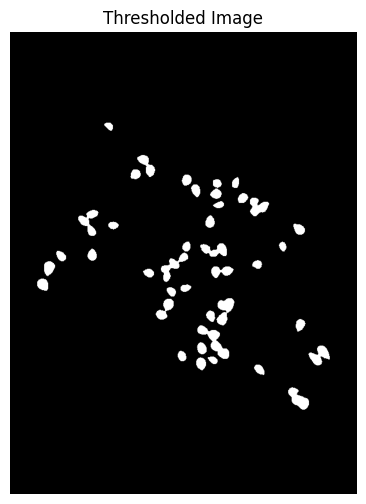

In [98]:
_, thresh = cv2.threshold(blur, 160, 255, cv2.THRESH_BINARY)
show_image("Thresholded Image", thresh)

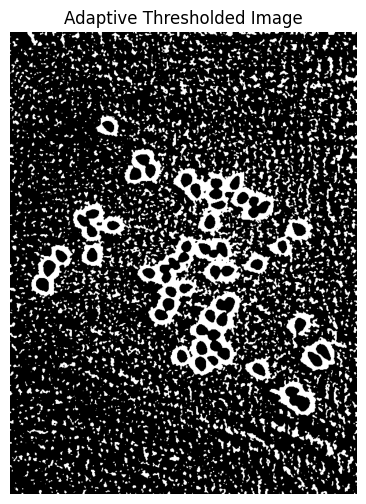

In [99]:
bin1 = cv2.adaptiveThreshold(blur, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 5)
show_image("Adaptive Thresholded Image", bin1)

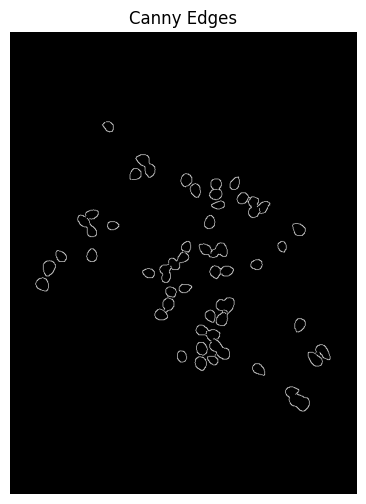

In [100]:
canny1 = cv2.Canny(blur, 70, 200)
show_image("Canny Edges", canny1)

Objetos detectados: 43


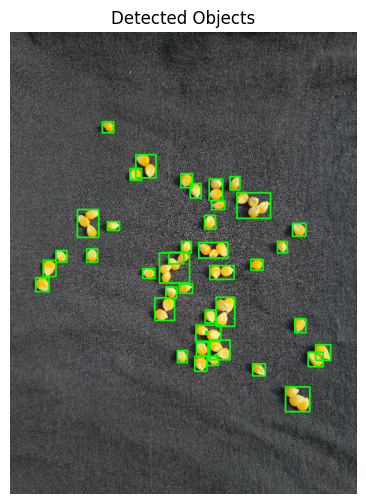

In [101]:
contours, _ = cv2.findContours(canny1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
print("Objetos detectados:", len(contours))
show_image("Detected Objects", img)